In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv(r"C:\Users\khadija\Desktop\API_machine_learning-1\Cardiovasculaires_Data.csv")
df.head()

,age,gender,status,pressurehight,pressurelow,glucose,kcm,troponin,impluse
0,64,1,negative,160,83,160.0,1.80,0.012,66
1,21,1,positive,98,46,296.0,6.75,1.060,94
2,55,1,negative,160,77,270.0,1.99,0.003,64
3,64,1,positive,120,55,270.0,13.87,0.122,70
4,55,1,negative,112,65,300.0,1.08,0.003,64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   status         1319 non-null   object 
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   impluse        1319 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [18]:
df.isnull().sum()

age              0
gender           0
status           0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
impluse          0
dtype: int64

In [19]:
a = df.duplicated().sum()
print(a)

0


In [20]:
df.describe()


,age,gender,pressurehight,pressurelow,glucose,kcm,troponin,impluse
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,127.170584,72.269143,146.634344,15.274306,0.360942,78.336619
std,13.647315,0.474027,26.122720,14.033924,74.923045,46.327083,1.154568,51.630270
min,14.000000,0.000000,42.000000,38.000000,35.000000,0.321000,0.001000,20.000000
25%,47.000000,0.000000,110.000000,62.000000,98.000000,1.655000,0.006000,64.000000
50%,58.000000,1.000000,124.000000,72.000000,116.000000,2.850000,0.014000,74.000000
75%,65.000000,1.000000,143.000000,81.000000,169.500000,5.805000,0.085500,85.000000
max,103.000000,1.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1111.000000


## Distribution de la cible (status)

In [27]:
#  Countplot pour visualiser la distribution des variables catégorielle
def plot_countplot(df, column, hue= None,title=None):
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column,hue=hue, data=df)
    plt.title(title if title else f"Répartition de {column} selon {hue} ")
    plt.xlabel(column)
    plt.ylabel("Nombre de counts")
    plt.show()

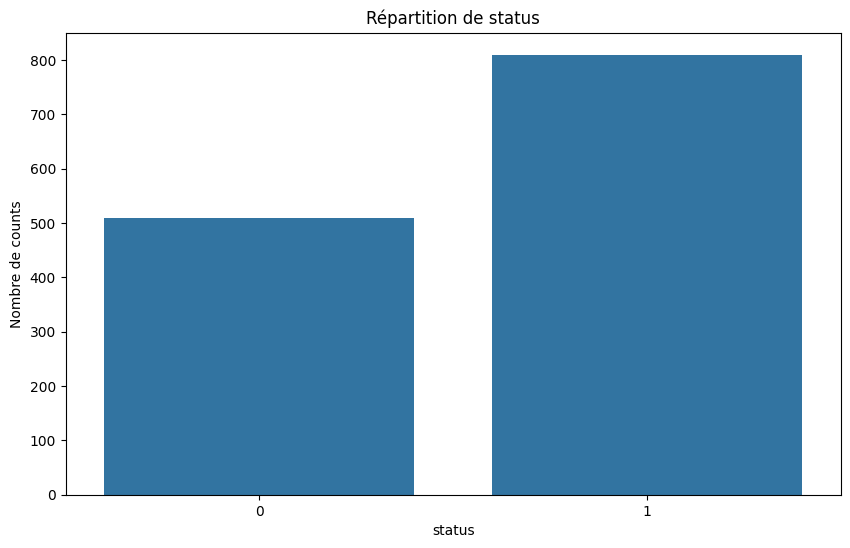

In [28]:
plot_countplot(df,column='status',title= 'Répartition de status' )

Pour la variable gender :
- O pour les femmes 
- 1 pour les hommes 

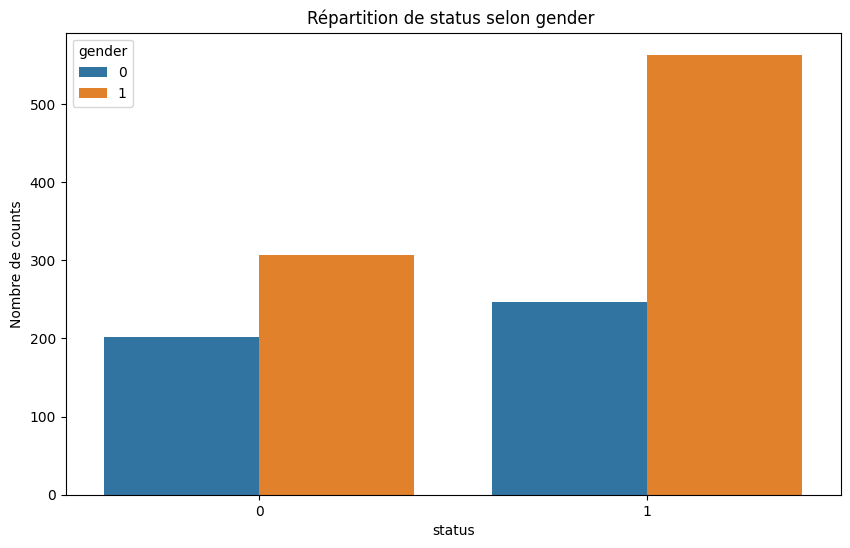

In [29]:
plot_countplot(df, hue = 'gender' , column='status')

## Correlation entre le colonnes numériques 

In [ ]:
# trasform status(cible) to numériques (boolen )
df['status'] = df['status'].map({'positive': 1, 'negative': 0})

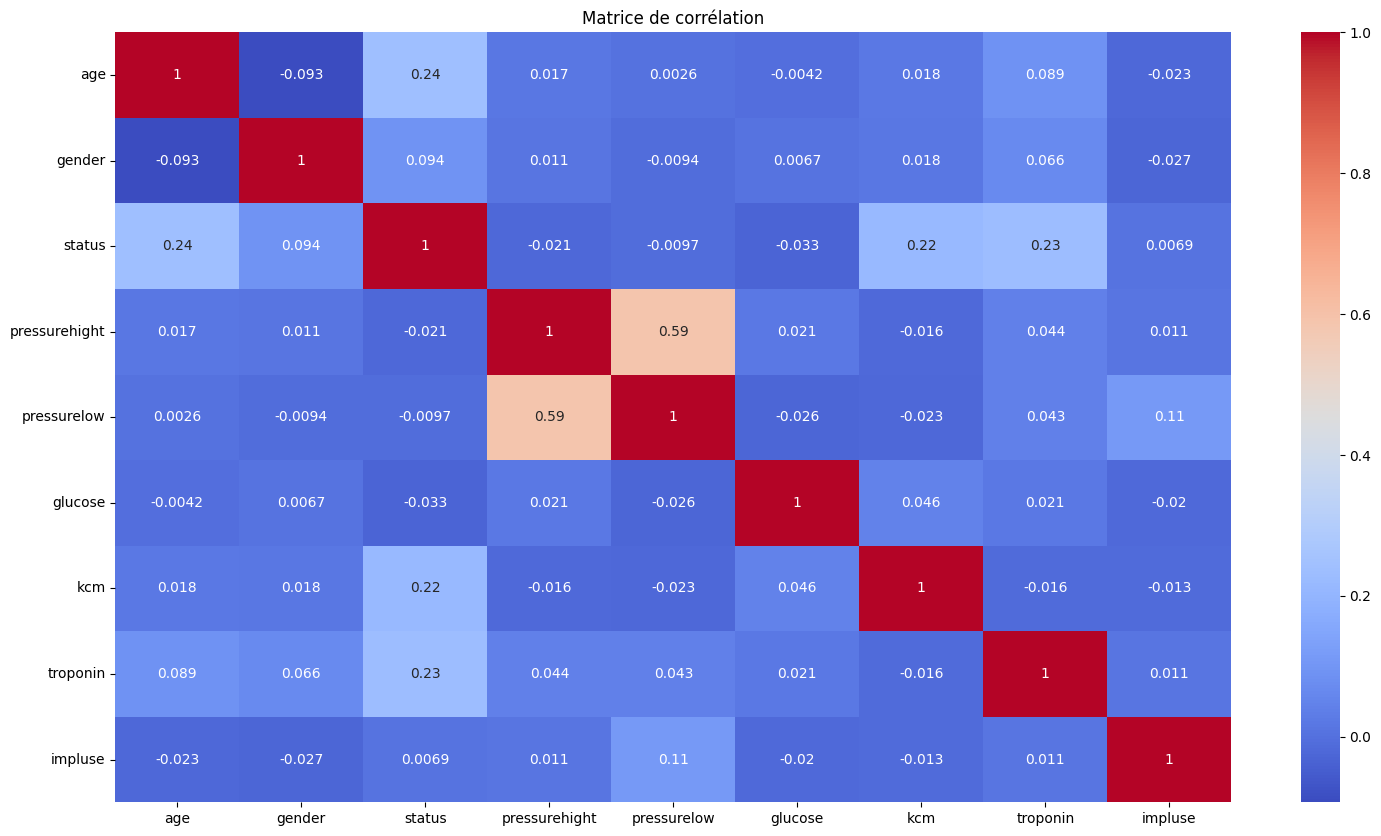

In [25]:
# Sélection des colonnes numériques
df_numeric = df.select_dtypes(include=['number'])


# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

Les variables Impluse, glucose, pressureLow, pressureight et gender présentent une faible corrélation avec la variable cible Status, d’après la matrice de corrélation.

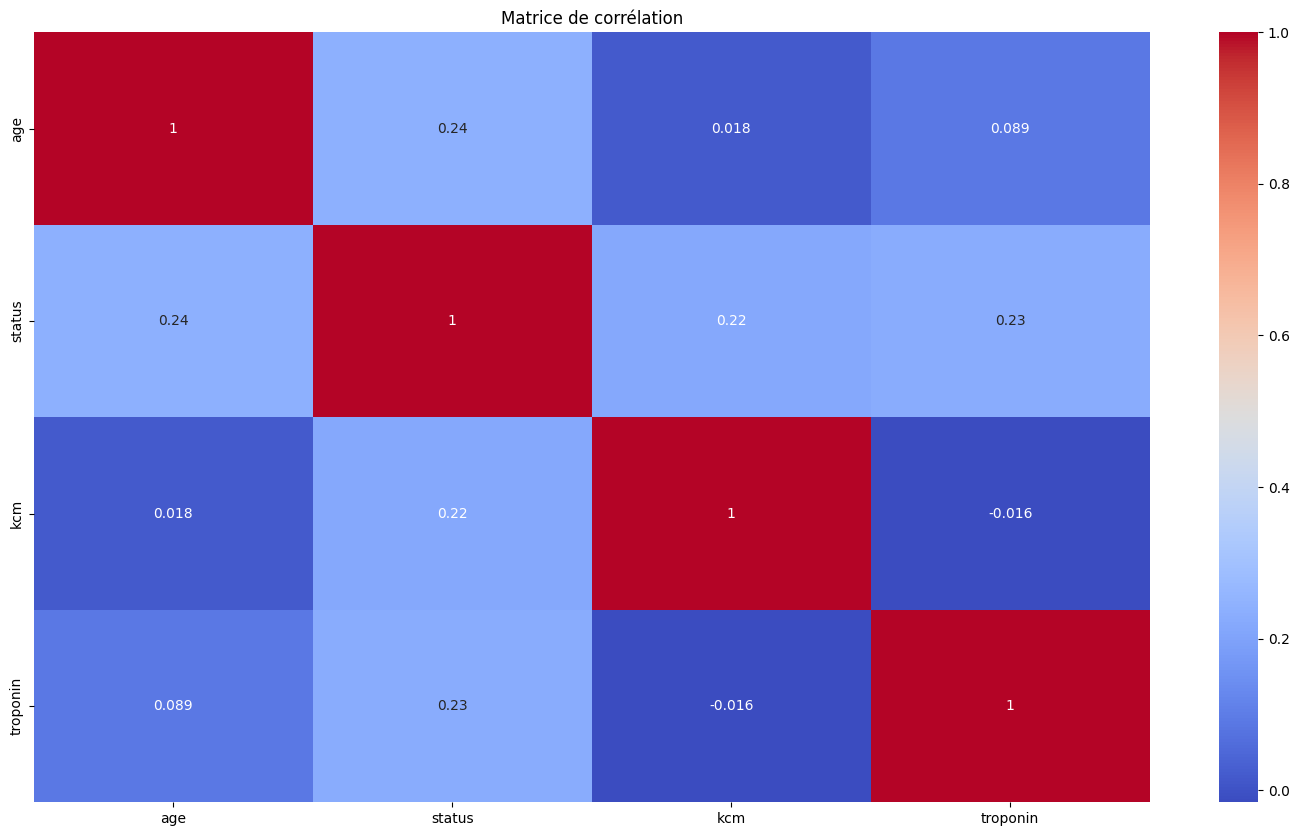

In [32]:
# Sélection des colonnes numériques
df_numeric = df.select_dtypes(include=['number']).drop(columns=['impluse', 'glucose', 'pressurelow', 'pressurehight', 'gender'])


# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()